# Transfer Learning

## Import Packages

In [1]:
# !pip uninstall ml_project_util -y
# !pip install git+https://github.com/aris-gk3/ml_project_util.git
# or for local development:
# %pip uninstall ml_project_util -y
%pip install git+https://github.com/aris-gk3/ml_project_util.git

import tensorflow as tf
import os
from tensorflow.keras import layers, models # type: ignore
from tensorflow.keras.applications import VGG16 # type: ignore
# Local Packages
from ml_project_util.path import path_definition
from ml_project_util.train import train, freeze_layers, unfreeze_head, unfreeze_block
from ml_project_util.quantization_util import quant_model, quant_bw_search
from ml_project_util.model_evaluation import model_evaluation_precise
from ml_project_util.history import concatenate_json, plot_json

  Cloning https://github.com/aris-gk3/ml_project_util.git to /tmp/pip-req-build-18r1svk0
  Running command git clone --filter=blob:none --quiet https://github.com/aris-gk3/ml_project_util.git /tmp/pip-req-build-18r1svk0
  Resolved https://github.com/aris-gk3/ml_project_util.git to commit cb04cae83ee57d134658765811e153245b1cf241
  Preparing metadata (setup.py) ... done
  Created wheel for ml_project_util: filename=ml_project_util-0.1-py3-none-any.whl size=22731 sha256=b13f6861d501fb258c0c37fe9bc8c5f8b3a3a162cc19b2fb9bf2709fec7879cf
  Stored in directory: /tmp/pip-ephem-wheel-cache-vamao2k6/wheels/9b/33/7a/e8e8f55a4c6aa39df26369c48b9e3497c6dde4c7663912f8ef
Successfully built ml_project_util
Note: you may need to restart the kernel to use updated packages.


2025-06-19 10:49:25.754633: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750330165.952785      18 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750330166.013073      18 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Define Variable Paths

In [2]:
dict = path_definition(ds_rel_path='oxdord-pets-restructured') # path_definition.config to read
BASE_PATH = dict['BASE_PATH']
PATH_DATASET = dict['PATH_DATASET']
PATH_TEST = dict['PATH_TEST']
PATH_RAWDATA = dict['PATH_RAWDATA']
PATH_JOINEDDATA = dict['PATH_JOINEDDATA']
PATH_SAVEDMODELS = dict['PATH_SAVEDMODELS']

ds_rel_path set to: oxdord-pets-restructured


## Define the Model

In [3]:
saved_model_name = 'OP1_P3_037_val0.4564'
parent_name = saved_model_name[:3]
model_path = '/kaggle/input/op1_p3/keras/default/1/OP1_P3_037_val0.4564.keras'
# model_path = f"{PATH_SAVEDMODELS}/{parent_name}/{saved_model_name}.keras"
model = tf.keras.models.load_model(model_path)

I0000 00:00:1750330181.123670      18 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


## Train the Model

- block1_conv1 (Conv2D), Trainable: False
- block1_conv2 (Conv2D), Trainable: False
- block1_pool (MaxPooling2D), Trainable: False
- block2_conv1 (Conv2D), Trainable: False
- block2_conv2 (Conv2D), Trainable: False
- block2_pool (MaxPooling2D), Trainable: False
- block3_conv1 (Conv2D), Trainable: False
- block3_conv2 (Conv2D), Trainable: False
- block3_conv3 (Conv2D), Trainable: False
- block3_pool (MaxPooling2D), Trainable: False
- block4_conv1 (Conv2D), Trainable: False
- block4_conv2 (Conv2D), Trainable: False
- block4_conv3 (Conv2D), Trainable: False
- block4_pool (MaxPooling2D), Trainable: False
- block5_conv1 (Conv2D), Trainable: False
- block5_conv2 (Conv2D), Trainable: False
- block5_conv3 (Conv2D), Trainable: False
- block5_pool (MaxPooling2D), Trainable: False
- global_average_pooling2d_2 (GlobalAveragePooling2D), Trainable: False
- dense_4 (Dense), Trainable: False
- dropout_2 (Dropout), Trainable: False
- dense_5 (Dense), Trainable: False


- block1_conv1 (Conv2D), Trainabl

I0000 00:00:1750330191.269887      90 service.cc:148] XLA service 0x7b3158001780 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750330191.272002      90 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1750330191.752369      90 cuda_dnn.cc:529] Loaded cuDNN version 90300


  2/167 ━━━━━━━━━━━━━━━━━━━━ 15s 94ms/step - accuracy: 0.8438 - loss: 0.4318 

I0000 00:00:1750330200.954349      90 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 61/167 ━━━━━━━━━━━━━━━━━━━━ 36s 345ms/step - accuracy: 0.7643 - loss: 0.7992

Corrupt JPEG data: premature end of data segment


167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step - accuracy: 0.7596 - loss: 0.8079
Epoch 1: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_FT1_001_val0.5586.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 85s 433ms/step - accuracy: 0.7597 - loss: 0.8077 - val_accuracy: 0.8277 - val_loss: 0.5586
Epoch 2/30
 66/167 ━━━━━━━━━━━━━━━━━━━━ 36s 365ms/step - accuracy: 0.8121 - loss: 0.5739

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 0.8213 - loss: 0.5515
Epoch 2: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_FT1_002_val0.5511.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 65s 385ms/step - accuracy: 0.8214 - loss: 0.5511 - val_accuracy: 0.8518 - val_loss: 0.5511
Epoch 3/30
 62/167 ━━━━━━━━━━━━━━━━━━━━ 38s 367ms/step - accuracy: 0.8570 - loss: 0.4433

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step - accuracy: 0.8628 - loss: 0.4266
Epoch 3: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_FT1_003_val0.4685.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 65s 387ms/step - accuracy: 0.8629 - loss: 0.4265 - val_accuracy: 0.8653 - val_loss: 0.4685
Epoch 4/30
 64/167 ━━━━━━━━━━━━━━━━━━━━ 37s 363ms/step - accuracy: 0.8867 - loss: 0.3840

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 0.8883 - loss: 0.3603
Epoch 4: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_FT1_004_val0.5139.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 380ms/step - accuracy: 0.8883 - loss: 0.3601 - val_accuracy: 0.8616 - val_loss: 0.5139
Epoch 5/30
 61/167 ━━━━━━━━━━━━━━━━━━━━ 38s 367ms/step - accuracy: 0.8875 - loss: 0.3402

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.8943 - loss: 0.3148
Epoch 5: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_FT1_005_val0.5827.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 383ms/step - accuracy: 0.8945 - loss: 0.3144 - val_accuracy: 0.8510 - val_loss: 0.5827
Epoch 6/30
 65/167 ━━━━━━━━━━━━━━━━━━━━ 37s 364ms/step - accuracy: 0.9112 - loss: 0.2858

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 0.9156 - loss: 0.2611
Epoch 6: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_FT1_006_val0.5694.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 384ms/step - accuracy: 0.9156 - loss: 0.2609 - val_accuracy: 0.8623 - val_loss: 0.5694
Epoch 7/30
 61/167 ━━━━━━━━━━━━━━━━━━━━ 39s 369ms/step - accuracy: 0.8970 - loss: 0.3235

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step - accuracy: 0.9074 - loss: 0.2802
Epoch 7: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_FT1_007_val0.5372.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 65s 385ms/step - accuracy: 0.9075 - loss: 0.2798 - val_accuracy: 0.8600 - val_loss: 0.5372


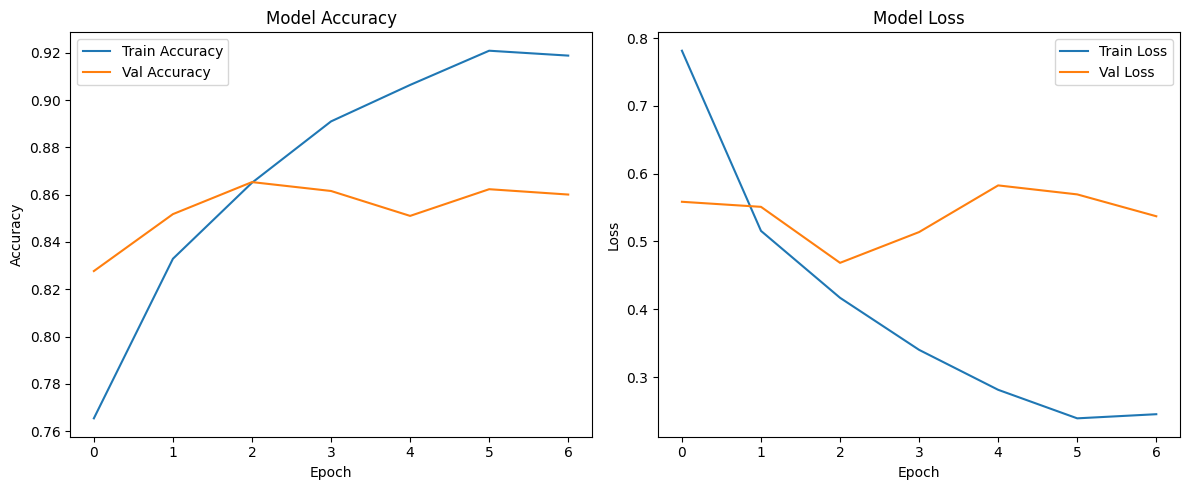

In [4]:
model_name = 'OP1_P3_FT1'
epochs = 30
lr = 1e-4
optimizer = 'Adam'

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.03),  # down from 0.1
    layers.RandomZoom(0.03),      # down from 0.1
    layers.RandomContrast(0.05)   # down from 0.1
])

freeze_layers(model, verbose=1)
unfreeze_head(model, verbose=1)
unfreeze_block(model, verbose=1)
train(model, epochs, lr, optimizer, model_name, is_binary=0, plot=True, augmentation_pipeline=data_augmentation, early_stopping=True)

In [5]:
model_evaluation_precise(model)

Found 736 files belonging to 37 classes.
Start evaluating batches
Batch Number: 0

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


Batch Number: 22
Precise test accuracy: 0.87772
Precise test loss: 0.41910


(0.8777174, 0.4191017283693604)

In [6]:
saved_model_name = 'OP1_P3_037_val0.4564'
parent_name = saved_model_name[:3]
model_path = '/kaggle/input/op1_p3/keras/default/1/OP1_P3_037_val0.4564.keras'
# model_path = f"{PATH_SAVEDMODELS}/{parent_name}/{saved_model_name}.keras"
model = tf.keras.models.load_model(model_path)

- block1_conv1 (Conv2D), Trainable: False
- block1_conv2 (Conv2D), Trainable: False
- block1_pool (MaxPooling2D), Trainable: False
- block2_conv1 (Conv2D), Trainable: False
- block2_conv2 (Conv2D), Trainable: False
- block2_pool (MaxPooling2D), Trainable: False
- block3_conv1 (Conv2D), Trainable: False
- block3_conv2 (Conv2D), Trainable: False
- block3_conv3 (Conv2D), Trainable: False
- block3_pool (MaxPooling2D), Trainable: False
- block4_conv1 (Conv2D), Trainable: False
- block4_conv2 (Conv2D), Trainable: False
- block4_conv3 (Conv2D), Trainable: False
- block4_pool (MaxPooling2D), Trainable: False
- block5_conv1 (Conv2D), Trainable: False
- block5_conv2 (Conv2D), Trainable: False
- block5_conv3 (Conv2D), Trainable: False
- block5_pool (MaxPooling2D), Trainable: False
- global_average_pooling2d_2 (GlobalAveragePooling2D), Trainable: False
- dense_4 (Dense), Trainable: False
- dropout_2 (Dropout), Trainable: False
- dense_5 (Dense), Trainable: False


- block1_conv1 (Conv2D), Trainabl

Corrupt JPEG data: premature end of data segment


167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.8819 - loss: 0.3570
Epoch 1: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_FT2_001_val0.4604.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 70s 393ms/step - accuracy: 0.8819 - loss: 0.3569 - val_accuracy: 0.8691 - val_loss: 0.4604
Epoch 2/35
 66/167 ━━━━━━━━━━━━━━━━━━━━ 36s 362ms/step - accuracy: 0.8880 - loss: 0.3197

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step - accuracy: 0.8905 - loss: 0.3149
Epoch 2: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_FT2_002_val0.4867.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 65s 385ms/step - accuracy: 0.8905 - loss: 0.3148 - val_accuracy: 0.8653 - val_loss: 0.4867
Epoch 3/35
 62/167 ━━━━━━━━━━━━━━━━━━━━ 38s 365ms/step - accuracy: 0.8881 - loss: 0.3109

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.8945 - loss: 0.3031
Epoch 3: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_FT2_003_val0.4619.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 65s 386ms/step - accuracy: 0.8946 - loss: 0.3031 - val_accuracy: 0.8698 - val_loss: 0.4619
Epoch 4/35
 64/167 ━━━━━━━━━━━━━━━━━━━━ 37s 366ms/step - accuracy: 0.9040 - loss: 0.2832

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step - accuracy: 0.9059 - loss: 0.2775
Epoch 4: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_FT2_004_val0.4561.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 65s 385ms/step - accuracy: 0.9059 - loss: 0.2776 - val_accuracy: 0.8698 - val_loss: 0.4561
Epoch 5/35
 61/167 ━━━━━━━━━━━━━━━━━━━━ 38s 365ms/step - accuracy: 0.9203 - loss: 0.2374

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step - accuracy: 0.9180 - loss: 0.2443
Epoch 5: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_FT2_005_val0.4679.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 65s 387ms/step - accuracy: 0.9179 - loss: 0.2445 - val_accuracy: 0.8691 - val_loss: 0.4679
Epoch 6/35
 65/167 ━━━━━━━━━━━━━━━━━━━━ 37s 367ms/step - accuracy: 0.9242 - loss: 0.2236

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step - accuracy: 0.9259 - loss: 0.2240
Epoch 6: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_FT2_006_val0.4729.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 65s 386ms/step - accuracy: 0.9258 - loss: 0.2240 - val_accuracy: 0.8728 - val_loss: 0.4729
Epoch 7/35
 61/167 ━━━━━━━━━━━━━━━━━━━━ 38s 361ms/step - accuracy: 0.9213 - loss: 0.2154

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 0.9256 - loss: 0.2112
Epoch 7: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_FT2_007_val0.4618.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 384ms/step - accuracy: 0.9256 - loss: 0.2113 - val_accuracy: 0.8811 - val_loss: 0.4618
Epoch 8/35
 82/167 ━━━━━━━━━━━━━━━━━━━━ 31s 365ms/step - accuracy: 0.9305 - loss: 0.1997

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.9299 - loss: 0.2025
Epoch 8: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_FT2_008_val0.4547.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 384ms/step - accuracy: 0.9299 - loss: 0.2026 - val_accuracy: 0.8856 - val_loss: 0.4547
Epoch 9/35
 66/167 ━━━━━━━━━━━━━━━━━━━━ 37s 367ms/step - accuracy: 0.9405 - loss: 0.2047

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step - accuracy: 0.9367 - loss: 0.1975
Epoch 9: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_FT2_009_val0.4430.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 65s 386ms/step - accuracy: 0.9366 - loss: 0.1974 - val_accuracy: 0.8849 - val_loss: 0.4430
Epoch 10/35
 60/167 ━━━━━━━━━━━━━━━━━━━━ 39s 365ms/step - accuracy: 0.9413 - loss: 0.1687

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.9363 - loss: 0.1829
Epoch 10: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_FT2_010_val0.4599.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 381ms/step - accuracy: 0.9363 - loss: 0.1830 - val_accuracy: 0.8728 - val_loss: 0.4599
Epoch 11/35
 63/167 ━━━━━━━━━━━━━━━━━━━━ 37s 365ms/step - accuracy: 0.9333 - loss: 0.1949

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 0.9404 - loss: 0.1794
Epoch 11: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_FT2_011_val0.4660.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 384ms/step - accuracy: 0.9405 - loss: 0.1792 - val_accuracy: 0.8819 - val_loss: 0.4660
Epoch 12/35
 80/167 ━━━━━━━━━━━━━━━━━━━━ 31s 361ms/step - accuracy: 0.9336 - loss: 0.1746

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 0.9397 - loss: 0.1673
Epoch 12: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_FT2_012_val0.4731.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 379ms/step - accuracy: 0.9398 - loss: 0.1672 - val_accuracy: 0.8856 - val_loss: 0.4731
Epoch 13/35
 85/167 ━━━━━━━━━━━━━━━━━━━━ 29s 362ms/step - accuracy: 0.9467 - loss: 0.1445

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.9478 - loss: 0.1461
Epoch 13: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_FT2_013_val0.4698.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 383ms/step - accuracy: 0.9478 - loss: 0.1462 - val_accuracy: 0.8834 - val_loss: 0.4698


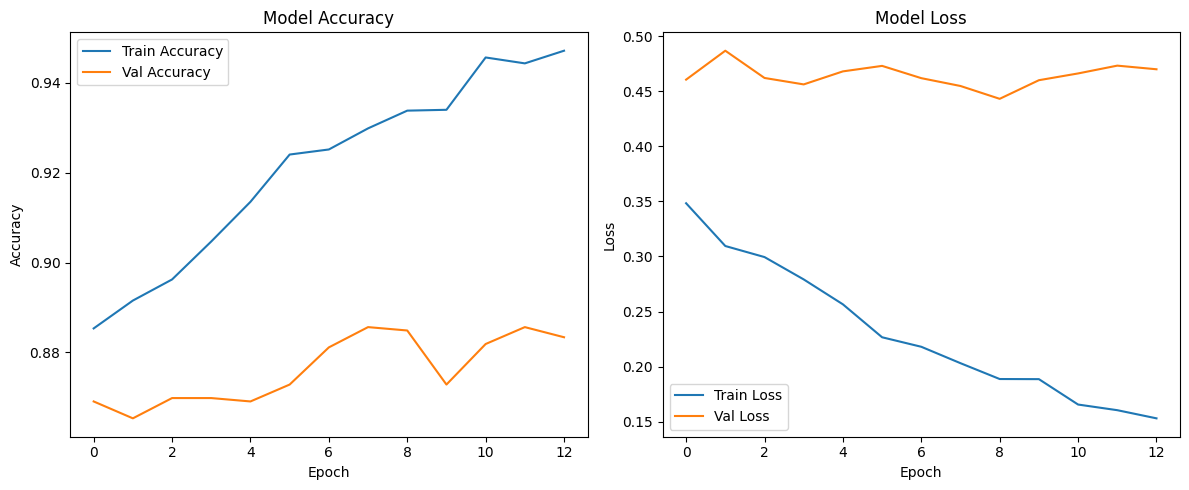

In [7]:
model_name = 'OP1_P3_FT2'
epochs = 35
lr = 1e-5
optimizer = 'Adam'

freeze_layers(model, verbose=1)
unfreeze_head(model, verbose=1)
unfreeze_block(model, verbose=1)
train(model, epochs, lr, optimizer, model_name, is_binary=0, plot=True, augmentation_pipeline=data_augmentation, early_stopping=True)

In [8]:
model_evaluation_precise(model)

Found 736 files belonging to 37 classes.
Start evaluating batches
Batch Number: 3

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


Batch Number: 22
Precise test accuracy: 0.89266
Precise test loss: 0.34107


(0.89266306, 0.3410744952118915)

In [9]:
saved_model_name = 'OP1_P3_037_val0.4564'
parent_name = saved_model_name[:3]
model_path = '/kaggle/input/op1_p3/keras/default/1/OP1_P3_037_val0.4564.keras'
# model_path = f"{PATH_SAVEDMODELS}/{parent_name}/{saved_model_name}.keras"
model = tf.keras.models.load_model(model_path)

- block1_conv1 (Conv2D), Trainable: False
- block1_conv2 (Conv2D), Trainable: False
- block1_pool (MaxPooling2D), Trainable: False
- block2_conv1 (Conv2D), Trainable: False
- block2_conv2 (Conv2D), Trainable: False
- block2_pool (MaxPooling2D), Trainable: False
- block3_conv1 (Conv2D), Trainable: False
- block3_conv2 (Conv2D), Trainable: False
- block3_conv3 (Conv2D), Trainable: False
- block3_pool (MaxPooling2D), Trainable: False
- block4_conv1 (Conv2D), Trainable: False
- block4_conv2 (Conv2D), Trainable: False
- block4_conv3 (Conv2D), Trainable: False
- block4_pool (MaxPooling2D), Trainable: False
- block5_conv1 (Conv2D), Trainable: False
- block5_conv2 (Conv2D), Trainable: False
- block5_conv3 (Conv2D), Trainable: False
- block5_pool (MaxPooling2D), Trainable: False
- global_average_pooling2d_2 (GlobalAveragePooling2D), Trainable: False
- dense_4 (Dense), Trainable: False
- dropout_2 (Dropout), Trainable: False
- dense_5 (Dense), Trainable: False


- block1_conv1 (Conv2D), Trainabl

Corrupt JPEG data: premature end of data segment


167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 0.8957 - loss: 0.3332
Epoch 1: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_FT3_001_val0.4542.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 70s 392ms/step - accuracy: 0.8957 - loss: 0.3333 - val_accuracy: 0.8721 - val_loss: 0.4542
Epoch 2/40
 66/167 ━━━━━━━━━━━━━━━━━━━━ 36s 360ms/step - accuracy: 0.8909 - loss: 0.3120

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.8914 - loss: 0.3167
Epoch 2: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_FT3_002_val0.4569.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 382ms/step - accuracy: 0.8913 - loss: 0.3168 - val_accuracy: 0.8728 - val_loss: 0.4569
Epoch 3/40
 62/167 ━━━━━━━━━━━━━━━━━━━━ 37s 358ms/step - accuracy: 0.8951 - loss: 0.3145

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 0.8943 - loss: 0.3195
Epoch 3: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_FT3_003_val0.4545.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 380ms/step - accuracy: 0.8942 - loss: 0.3196 - val_accuracy: 0.8758 - val_loss: 0.4545
Epoch 4/40
 64/167 ━━━━━━━━━━━━━━━━━━━━ 38s 374ms/step - accuracy: 0.9082 - loss: 0.2995

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step - accuracy: 0.9033 - loss: 0.3049
Epoch 4: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_FT3_004_val0.4568.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 66s 390ms/step - accuracy: 0.9033 - loss: 0.3050 - val_accuracy: 0.8736 - val_loss: 0.4568
Epoch 5/40
 61/167 ━━━━━━━━━━━━━━━━━━━━ 38s 365ms/step - accuracy: 0.8997 - loss: 0.3029

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.9025 - loss: 0.2953
Epoch 5: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_FT3_005_val0.4579.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 65s 386ms/step - accuracy: 0.9025 - loss: 0.2953 - val_accuracy: 0.8758 - val_loss: 0.4579


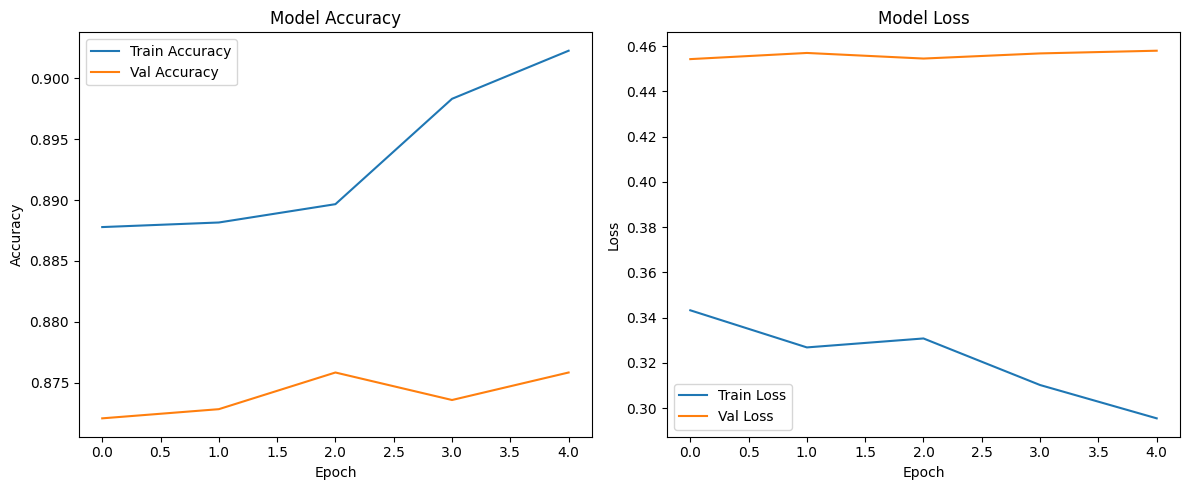

In [10]:
model_name = 'OP1_P3_FT3'
epochs = 40
lr = 1e-6
optimizer = 'Adam'

freeze_layers(model, verbose=1)
unfreeze_head(model, verbose=1)
unfreeze_block(model, verbose=1)
train(model, epochs, lr, optimizer, model_name, is_binary=0, plot=True, augmentation_pipeline=data_augmentation, early_stopping=True)

In [11]:
model_evaluation_precise(model)

Found 736 files belonging to 37 classes.
Start evaluating batches
Batch Number: 3

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


Batch Number: 22
Precise test accuracy: 0.88723
Precise test loss: 0.33699


(0.88722825, 0.3369900022187959)

- block1_conv1 (Conv2D), Trainable: False
- block1_conv2 (Conv2D), Trainable: False
- block1_pool (MaxPooling2D), Trainable: False
- block2_conv1 (Conv2D), Trainable: False
- block2_conv2 (Conv2D), Trainable: False
- block2_pool (MaxPooling2D), Trainable: False
- block3_conv1 (Conv2D), Trainable: False
- block3_conv2 (Conv2D), Trainable: False
- block3_conv3 (Conv2D), Trainable: False
- block3_pool (MaxPooling2D), Trainable: False
- block4_conv1 (Conv2D), Trainable: False
- block4_conv2 (Conv2D), Trainable: False
- block4_conv3 (Conv2D), Trainable: False
- block4_pool (MaxPooling2D), Trainable: False
- block5_conv1 (Conv2D), Trainable: False
- block5_conv2 (Conv2D), Trainable: False
- block5_conv3 (Conv2D), Trainable: False
- block5_pool (MaxPooling2D), Trainable: False
- global_average_pooling2d_2 (GlobalAveragePooling2D), Trainable: False
- dense_4 (Dense), Trainable: False
- dropout_2 (Dropout), Trainable: False
- dense_5 (Dense), Trainable: False


- block1_conv1 (Conv2D), Trainabl

Corrupt JPEG data: premature end of data segment


167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 0.9109 - loss: 0.2822
Epoch 1: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_FT4_001_val0.4586.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 71s 396ms/step - accuracy: 0.9108 - loss: 0.2823 - val_accuracy: 0.8751 - val_loss: 0.4586
Epoch 2/40
 66/167 ━━━━━━━━━━━━━━━━━━━━ 37s 366ms/step - accuracy: 0.9074 - loss: 0.2982

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.9051 - loss: 0.3005
Epoch 2: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_FT4_002_val0.4589.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 65s 386ms/step - accuracy: 0.9051 - loss: 0.3005 - val_accuracy: 0.8751 - val_loss: 0.4589
Epoch 3/40
 62/167 ━━━━━━━━━━━━━━━━━━━━ 38s 369ms/step - accuracy: 0.9021 - loss: 0.3021

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step - accuracy: 0.9048 - loss: 0.2894
Epoch 3: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_FT4_003_val0.4587.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 65s 386ms/step - accuracy: 0.9048 - loss: 0.2892 - val_accuracy: 0.8736 - val_loss: 0.4587
Epoch 4/40
 64/167 ━━━━━━━━━━━━━━━━━━━━ 37s 368ms/step - accuracy: 0.9018 - loss: 0.3085

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 0.9038 - loss: 0.2951
Epoch 4: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_FT4_004_val0.4588.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 383ms/step - accuracy: 0.9038 - loss: 0.2951 - val_accuracy: 0.8736 - val_loss: 0.4588
Epoch 5/40
 61/167 ━━━━━━━━━━━━━━━━━━━━ 38s 363ms/step - accuracy: 0.8855 - loss: 0.3255

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 0.8911 - loss: 0.3191
Epoch 5: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_FT4_005_val0.4578.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 65s 385ms/step - accuracy: 0.8911 - loss: 0.3190 - val_accuracy: 0.8743 - val_loss: 0.4578
Epoch 6/40
 65/167 ━━━━━━━━━━━━━━━━━━━━ 37s 363ms/step - accuracy: 0.9014 - loss: 0.2903

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 0.9027 - loss: 0.2902
Epoch 6: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_FT4_006_val0.4582.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 383ms/step - accuracy: 0.9027 - loss: 0.2902 - val_accuracy: 0.8743 - val_loss: 0.4582
Epoch 7/40
 61/167 ━━━━━━━━━━━━━━━━━━━━ 38s 366ms/step - accuracy: 0.8938 - loss: 0.3121

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 0.9003 - loss: 0.2994
Epoch 7: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_FT4_007_val0.4578.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 384ms/step - accuracy: 0.9003 - loss: 0.2993 - val_accuracy: 0.8743 - val_loss: 0.4578
Epoch 8/40
 82/167 ━━━━━━━━━━━━━━━━━━━━ 31s 367ms/step - accuracy: 0.9019 - loss: 0.2967

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.9037 - loss: 0.2948
Epoch 8: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_FT4_008_val0.4579.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 65s 386ms/step - accuracy: 0.9037 - loss: 0.2948 - val_accuracy: 0.8736 - val_loss: 0.4579
Epoch 9/40
 66/167 ━━━━━━━━━━━━━━━━━━━━ 36s 361ms/step - accuracy: 0.9076 - loss: 0.2823

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 0.9077 - loss: 0.2845
Epoch 9: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_FT4_009_val0.4580.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 382ms/step - accuracy: 0.9077 - loss: 0.2845 - val_accuracy: 0.8751 - val_loss: 0.4580
Epoch 10/40
 60/167 ━━━━━━━━━━━━━━━━━━━━ 39s 367ms/step - accuracy: 0.9147 - loss: 0.2768

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step - accuracy: 0.9092 - loss: 0.2810
Epoch 10: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_FT4_010_val0.4573.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 65s 387ms/step - accuracy: 0.9091 - loss: 0.2811 - val_accuracy: 0.8758 - val_loss: 0.4573
Epoch 11/40
 63/167 ━━━━━━━━━━━━━━━━━━━━ 37s 363ms/step - accuracy: 0.9055 - loss: 0.2697

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.9041 - loss: 0.2781
Epoch 11: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_FT4_011_val0.4577.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 381ms/step - accuracy: 0.9041 - loss: 0.2782 - val_accuracy: 0.8758 - val_loss: 0.4577
Epoch 12/40
 80/167 ━━━━━━━━━━━━━━━━━━━━ 31s 366ms/step - accuracy: 0.8946 - loss: 0.3057

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 0.8963 - loss: 0.3018
Epoch 12: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_FT4_012_val0.4578.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 65s 385ms/step - accuracy: 0.8963 - loss: 0.3018 - val_accuracy: 0.8766 - val_loss: 0.4578
Epoch 13/40
 85/167 ━━━━━━━━━━━━━━━━━━━━ 29s 361ms/step - accuracy: 0.9026 - loss: 0.3011

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 0.9023 - loss: 0.2985
Epoch 13: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_FT4_013_val0.4579.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 66s 394ms/step - accuracy: 0.9022 - loss: 0.2984 - val_accuracy: 0.8774 - val_loss: 0.4579
Epoch 14/40
 66/167 ━━━━━━━━━━━━━━━━━━━━ 36s 361ms/step - accuracy: 0.9016 - loss: 0.2830

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 0.8981 - loss: 0.2949
Epoch 14: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_FT4_014_val0.4569.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 382ms/step - accuracy: 0.8980 - loss: 0.2950 - val_accuracy: 0.8758 - val_loss: 0.4569
Epoch 15/40
 65/167 ━━━━━━━━━━━━━━━━━━━━ 37s 367ms/step - accuracy: 0.8958 - loss: 0.3295

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step - accuracy: 0.9015 - loss: 0.3107
Epoch 15: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_FT4_015_val0.4572.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 65s 387ms/step - accuracy: 0.9016 - loss: 0.3105 - val_accuracy: 0.8774 - val_loss: 0.4572
Epoch 16/40
 91/167 ━━━━━━━━━━━━━━━━━━━━ 27s 365ms/step - accuracy: 0.9055 - loss: 0.2842

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.9060 - loss: 0.2851
Epoch 16: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_FT4_016_val0.4568.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 383ms/step - accuracy: 0.9060 - loss: 0.2851 - val_accuracy: 0.8766 - val_loss: 0.4568
Epoch 17/40
 60/167 ━━━━━━━━━━━━━━━━━━━━ 39s 366ms/step - accuracy: 0.8813 - loss: 0.3177

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.8912 - loss: 0.3048
Epoch 17: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_FT4_017_val0.4570.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 65s 386ms/step - accuracy: 0.8913 - loss: 0.3046 - val_accuracy: 0.8758 - val_loss: 0.4570
Epoch 18/40
 60/167 ━━━━━━━━━━━━━━━━━━━━ 38s 363ms/step - accuracy: 0.9050 - loss: 0.3129

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 0.9053 - loss: 0.3003
Epoch 18: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_FT4_018_val0.4574.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 384ms/step - accuracy: 0.9053 - loss: 0.3002 - val_accuracy: 0.8758 - val_loss: 0.4574
Epoch 19/40
 66/167 ━━━━━━━━━━━━━━━━━━━━ 37s 368ms/step - accuracy: 0.8989 - loss: 0.3088

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step - accuracy: 0.9007 - loss: 0.3011
Epoch 19: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_FT4_019_val0.4577.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 65s 388ms/step - accuracy: 0.9007 - loss: 0.3010 - val_accuracy: 0.8766 - val_loss: 0.4577
Epoch 20/40
 63/167 ━━━━━━━━━━━━━━━━━━━━ 37s 365ms/step - accuracy: 0.8950 - loss: 0.3301

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 0.8976 - loss: 0.3107
Epoch 20: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_FT4_020_val0.4571.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 382ms/step - accuracy: 0.8976 - loss: 0.3105 - val_accuracy: 0.8743 - val_loss: 0.4571


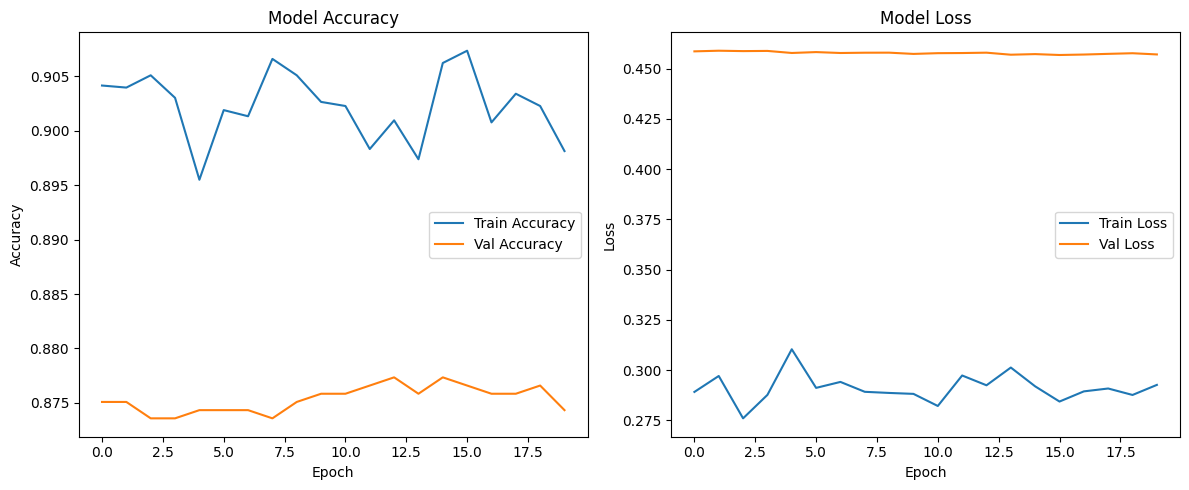

In [12]:
model_name = 'OP1_P3_FT4'
epochs = 40
lr = 1e-7
optimizer = 'Adam'

freeze_layers(model, verbose=1)
unfreeze_head(model, verbose=1)
unfreeze_block(model, verbose=1)
train(model, epochs, lr, optimizer, model_name, is_binary=0, plot=True, augmentation_pipeline=data_augmentation, early_stopping=True)

In [13]:
model_evaluation_precise(model)

Found 736 files belonging to 37 classes.
Start evaluating batches
Batch Number: 3

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


Batch Number: 22
Precise test accuracy: 0.88859
Precise test loss: 0.33841


(0.88858694, 0.33841414943985315)

## Interactively Train the Model

In [14]:
# model_name1 = 'EG2_P1_FT1'
# epochs = 5
# lr = 1e-4
# optimizer = 'Adam'

# data_augmentation = tf.keras.Sequential([
#     layers.RandomFlip("horizontal"),
#     layers.RandomRotation(0.1),
#     layers.RandomZoom(0.1),
#     layers.RandomContrast(0.1)
# ], name="data_augmentation")

# freeze_layers(model, verbose=1)
# unfreeze_head(model, verbose=1)
# unfreeze_block(model, verbose=1)
# train(model, epochs, lr, optimizer, model_name, is_binary=0, plot=True, augmentation_pipeline=data_augmentation)

In [15]:
# model_name2 = 'EG2_P1_FT1_2'
# epochs = 5
# train(model, epochs, lr, optimizer, model_name, is_binary=0, plot=True, augmentation_pipeline=data_augmentation)

In [16]:
# relpath1 = f"{PATH_RAWDATA}/{model_name1}.json"
# relpath2 = f"{PATH_RAWDATA}/{model_name2}.json"
# output_filename = f"{model_name1}_a"
# concatenate_json(relpath1, relpath2, output_filename)
# plot_json(json_name=output_filename, img_name=output_filename, data_type='joined')